In [43]:
import pybamm
import random
import numpy as np
import matplotlib.pyplot as plt

In [45]:
model = pybamm.lithium_ion.DFN()
param = pybamm.ParameterValues("Chen2020")
param["Current function [A]"] = "[input]"

In [160]:
time_step = 500 #[s]
final_time = 60000 #[s]
max_step = int(final_time/time_step)
i = [random.randint(-2, 2) for _ in range(max_step)]
soc_0 = param['Initial concentration in negative electrode [mol.m-3]']/param['Maximum concentration in negative electrode [mol.m-3]']

In [161]:
soc_0 = 0.5

In [162]:
sim = pybamm.Simulation(model, parameter_values=param)
sim.build(check_model=True, initial_soc=soc_0)

In [163]:
step = 0
while step < int(final_time/time_step): 
    sim.step(dt=time_step, save=True, inputs={'Current function [A]': i[step]})
    step += 1
sim.plot(["Current [A]", "Voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=16.666666666666668, step=0.16666666666666669…

In [164]:
solution = sim.solution

In [165]:
time = solution["Time [s]"].entries
soc = soc_0 - solution['Discharge capacity [A.h]'].entries/param['Nominal cell capacity [A.h]']
voltage = solution['Voltage [V]']
discharge_capacity = solution['Discharge capacity [A.h]'].entries


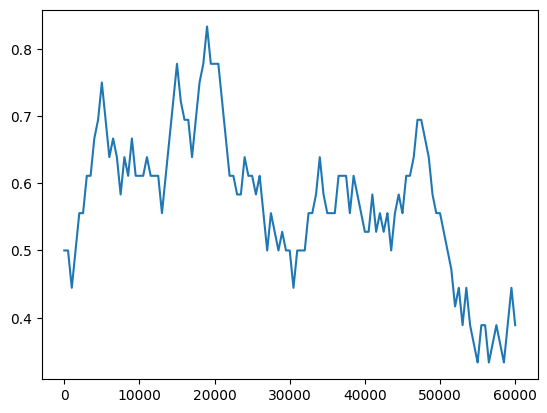

In [166]:
plt.plot(time,soc)

In [146]:
soc

array([0.        , 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.02777778, 0.02777778, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.13888889, 0.13888889, 0.08333333, 0.08333333, 0.05555556,
       0.05555556, 0.05555556, 0.05555556, 0.08333333, 0.08333333,
       0.13888889, 0.13888889, 0.11111111, 0.11111111, 0.13888889,
       0.13888889, 0.16666667, 0.16666667, 0.19444444, 0.19444444,
       0.19444444, 0.19444444, 0.16666667, 0.16666667, 0.19444444,
       0.19444444, 0.13888889, 0.13888889, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.16666667, 0.16666667, 0.19444444,
       0.19444444, 0.19444444, 0.19444444, 0.22222222, 0.22222222,
       0.27777778, 0.27777778, 0.30555556, 0.30555556, 0.27777778,
       0.27777778, 0.27777778, 0.27777778, 0.27777778, 0.27777778,
       0.27777778, 0.27777778, 0.30555556, 0.30555556, 0.30555556,
       0.30555556, 0.25      , 0.25      , 0.27777778, 0.27777